## Aula 10 - Limpesa e Tratamento de Dados

In [2]:
import pandas as pd
import seaborn as sns
import statistics as sts

In [3]:
# importar dados com pandas
dataset = pd.read_csv("Churn.csv", sep=";")

# visualizando os dados, para parte de cima.
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


Como em nossa base de dados não temos uma boa a informação sobre as colunas. Devemos achar uma maneira de
resolver esse problema.

In [4]:
# Tamanho da base de dados. A saida de dataset.shape é uma tupla com linhas e colunas (linhas, colunas)
quantidade_de_linhas = dataset.shape[0]
quantidade_de_colunas = dataset.shape[1]

quantidade_de_linhas

999

In [5]:
quantidade_de_colunas

12

Note como em nossa base de dados temos 999 linhas e 12 colunas.

In [6]:
dataset.columns = ["ID", "Score", "Estado" ,"Genero", "Idade", 
                   "Patrimonio", "Saldo", "Produtos", 
                   "TemCartCredito", "Ativo", "Salario", "Saiu"]

In [7]:
dataset.head()

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


Esses dados são de uma instituição financeira.

Observando a tabela, faremos uma análise dos clientes que apresentam uma tendência em deixar
a instituição financeira e a partir dos dados criar medidas para que essa tendência não se concretize.

# Análise exploratória

### Etapa 1

Nessa etapa vamos realizar uma análise dos dados categóricos, ou seja, vamos investigar os dados para
termos uma ideia do que casa informação dentro das categorias "Estado" e "Genero" significa. 

In [8]:
# explorando as categorias

# categoria Estado
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

Note que, pela saida dos dados existem alguns problemas, dentre eles são a existência de siglas de 
estados que não existem como: RP e TD, bem como estados que estão fora do nosso modelo de 
negócio, uma vez que só estamos interessados em estados da região Sul, portanto SP não deverá
existir em nossa amostra.

<AxesSubplot:xlabel='Estado'>

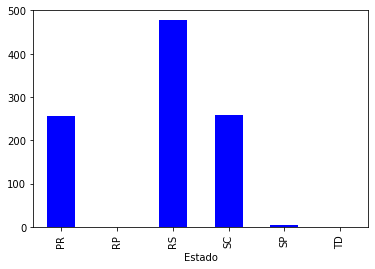

In [9]:
# gráfico de barras para Estados
agrupado.plot.bar(color='blue')

O gráfico de barras mostra que deveremos eliminar de nossa análise a representação RP, TD e SP.

In [10]:
# Analisar o grupo de Gênero
agrup_genero = dataset.groupby(['Genero']).size()
agrup_genero

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

Note nessa saida que deveremos agrupar termos que querem dizer a mesma coisa. A denominação F quer dizer o
mesmo que Fem que designa o mesmo que Feminino. Não podemos deixar descrito dessa maneira pois o modelo 
criado poderia aprender algo distinto com todas essas classificações.

<AxesSubplot:xlabel='Genero'>

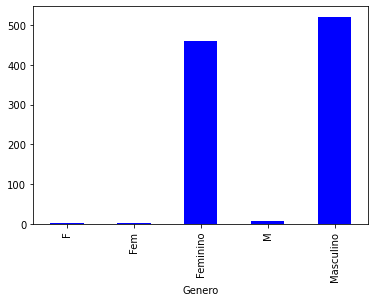

In [11]:
# gráfico de barras para Genero
agrup_genero.plot.bar(color='blue')

Perceba a quantidade de denominações diferentes. Deveremos tratar todas essas estruturas.

### Etapa 2

Nessa etapa vamos realizar uma análise dos dados numéricos, ou seja, vamos investigar os dados para
termos uma ideia do que cada informação dentro das características que apresentam-se 
como "Score", "Idade", "Saldo" e "Salario" significam.

- É importante salientar que também podemos encontrar problemas dentro de variáveis que são numéricas.

#### **Analisando Score**

In [12]:
# explorando a variável Score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Observando os dados, podemos verificar que foram analisados as 999 linhas, sendo a média de todos 
os scores iguais a 648.62, o desvio padrão de 98, um valor mínimo de 376 e um máximo de 850. Note como
o valor de média 648.62 está próximo da mediana 653.00. Logo não parece existir nenhum valor muito 
discrepante no score.

Text(0.5, 1.0, 'Score')

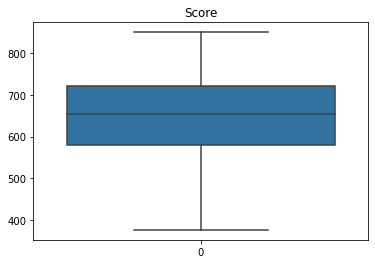

In [13]:
#Visualizando com um boxplot
sns.boxplot(dataset['Score']).set_title('Score')

O boxplot nos mostra como os valores de Score estão agrupados, temos que os valores variam de 
aproximadamente 400 para 800, que o primeiro quartil é próximo a 600 o segundo quartil é próximo
a 700 e a mediana está entre 600 e 700. Portanto os dados parecem não apresentar problemas.

Text(0.5, 1.0, 'Score')

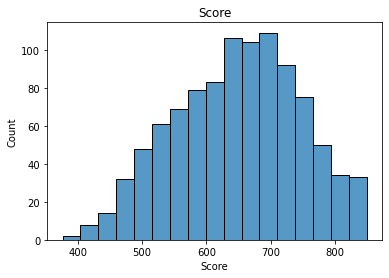

In [14]:
# Visualizando dados com um histograma
sns.histplot(dataset['Score']).set_title('Score')

A distribuição do Score é muito semelhante a uma distribuição normal, portanto até este momento não 
é necessário fornecer nenhum tratamento especial para a variável Score.

#### **Analisando Idade**

In [15]:
# explorando a variável Idade
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Observando os dados de saida já percebemos muito rapidamente que parecem existir problemas na idade, uma
vez que o valor mínimo da idade é -20, não existem idades negativas, provavelmente é um erro humano 
associado a cadastro. O valor máximo da idade também parece errado, já que idades de 140 anos são raras em
nossa sociedade (talvez exista em tempos bíblicos hehe).

Devemos perceber ainda que a média 38.92 e a mediana 37 são valores próximos, esse fato demostra que em 
sua totalidade os dados estão corretos, devendo haver realmente poucos casos discrepantes.

Text(0.5, 1.0, 'Idade')

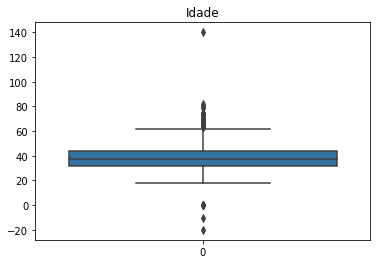

In [16]:
# boxplot da idade
sns.boxplot(dataset['Idade']).set_title('Idade')

Podemos observar pelo boxplot que acima de 80 anos somente existe um único ponto, enquanto abaixo de zero 
existem mais de um ponto. Notadamente era o que esperavamos (não são todos os pontos fora do domínio da 
idade).

Text(0.5, 1.0, 'Idade')

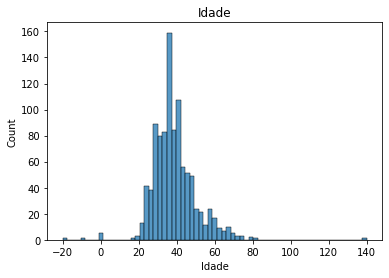

In [17]:
# Histograma para idade
sns.histplot(dataset['Idade']).set_title('Idade')

Pelo histograma podemos perceber que existe um valor idade em zero, uma idade entre zero e -20 
e um valor em -20, já para idades acima de 80 anos somente temos um único valor. Devemos encontrar
uma maneira de analisarmos esses valores.

#### **Analisando Saldo**

In [18]:
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Percebemos valores elevados para o saldo. A média é um valor também muito grande, note como o desvio padrão
é da ordem da média, logo um desvio muito elevado. O valor mínimo de saldo é zero parecendo ser um valor
coerente, o primeiro quartil sedo zero, a mediana um valor próximo a média e o segundo quartil um valor
elevado.

Text(0.5, 1.0, 'Saldo')

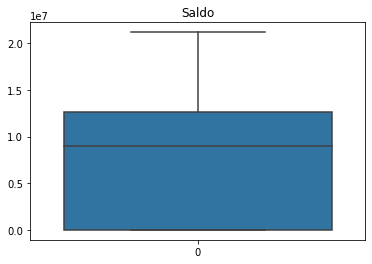

In [19]:
# boxplot idade
sns.boxplot(dataset['Saldo']).set_title('Saldo')

Text(0.5, 1.0, 'Saldo')

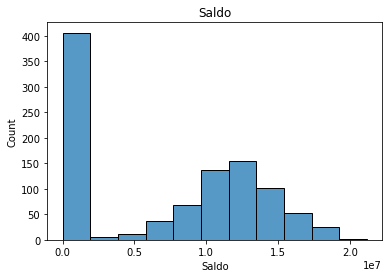

In [20]:
# Ditribuição de dados pelo histograma
sns.histplot(dataset['Saldo']).set_title('Saldo')

Observe pelo histograma como realmente existe uma grande quantidade de pessoas que apresentam valores
de saldo iguais a zero. Equanto o outro conjunto de pessoas apresentam valores em torno de uma média
sendo muito parecido com uma distribuição gaussiana.

#### **Analisando Salário**

In [21]:
# Descrevendo os dados
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Percebe-se que valores de média e mediana estão próximos, o valor do desvio-padrão é bem elevado, o valor de
mínimo e máximo são parecidos, então parece apresentar uma certa regularidade nos resultados.

Text(0.5, 1.0, 'Salário')

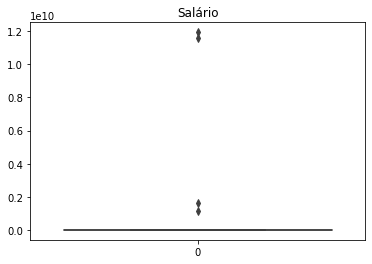

In [22]:
# Escrevendo o boxplot para salário
sns.boxplot(dataset['Salario']).set_title('Salário')

O nosso boxplot ficou bem diferente. Esse evento ocorre devido ao fato de existir uma concentração muito 
grande de valores próximo ao zero. O gráfico ainda mostra valores que estão fora do padrão, ou seja, são 
erros e podem prejudicar a análise do nosso modelo. Assim deveremos eliminar esses valores e atribuir valores de mediana.


/tmp/ipykernel_111724/3511276222.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Salario']).set_title('Salário')


Text(0.5, 1.0, 'Salário')

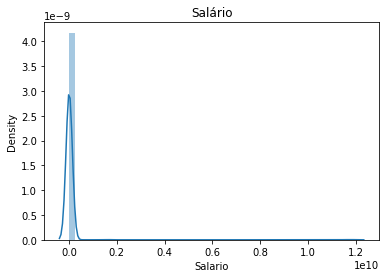

In [23]:
# Histograma para salário.
sns.distplot(dataset['Salario']).set_title('Salário')

Note como pelo histograma temos uma distribuição distorcida para próximo de valor igual a zero.
Como uma grande quantidade de clientes apresentam valores iguais a zero, então não podemos observer 
o conjunto de outros valores.

### Etapa 3

Verificação de valores não disponíveis

Agora deveremos observar se existem valores que estão não disponíveis. Lembre-se que valores não
disponíveis são diferentes de valores iguais a zero.

In [24]:
# Verificando valores NAN (não disponíveis)
dataset.isnull().sum()

ID                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

O método .isnull() verifica se existem valores não disponíveis em nosso dataset, logo depois somamos
a quantidade de valores não disponíveis para cada categoria com o método .sum().

Note que existem 8 valores não disponíveis para Genero e 7 para Salario. Assim, temos mais um problema
para resolver. Valores NAN em uma variável categórica (Genero) e valores NAN em uma variável numérica 
(Salario).

**Etapa de Análise exploratória Concluida.** 

Terminamos nossas etapas que envolvem as análises exploratória dos dados. Agora podemos iniciar a parte
em que modificamos os dados que apresentam erros para nosso modelo.

# Tratamento de erros

### Etapa 1

Nessa primeira etapa vamos descrever novamente o salário e substituir os valores faltantes
pela mediana. Vamos verificar novamente os valores faltantes na variável salário.

In [25]:
dataset['Salario'].isnull().sum()

7

In [26]:
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [27]:
mediana_salario = sts.median(dataset['Salario'])
mediana_salario

70518.0

In [28]:
# Substituindo valores faltantes (NAN) pela mediana
dataset['Salario'].fillna(mediana_salario, inplace=True)

O que o comando acima está mandando fazer é: na coluna de dados Salário, preencha (fill) os
valores faltantes (na) pela mediana de salário, tudo isso deve ser realizando inplace ou seja
sem criar um objeto.

In [29]:
# Verificando se ainda existem valores faltantes no salario
dataset['Salario'].isnull().sum()

0

Note como agora não temos mais valores faltantes no salário. Agora podemos ver como ficaram os 
resultados dessa etapa.

In [30]:
dataset['Salario'].describe()

count    9.990000e+02
mean     3.504085e+07
std      5.287241e+08
min      9.677000e+03
25%      2.856485e+06
50%      8.641028e+06
75%      1.402954e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salário')

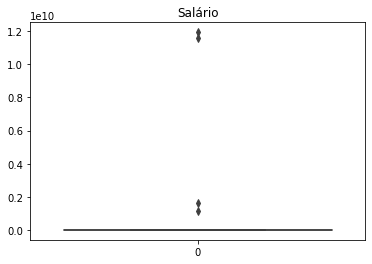

In [31]:
sns.boxplot(dataset['Salario']).set_title('Salário')

/tmp/ipykernel_111724/2580396449.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Salario']).set_title('Salário')


Text(0.5, 1.0, 'Salário')

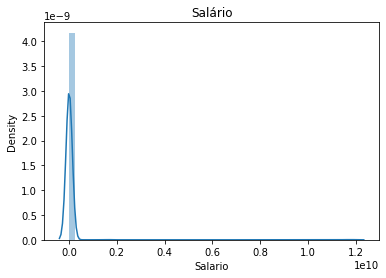

In [32]:
sns.distplot(dataset['Salario']).set_title('Salário')

Podemos observar que os valores faltantes não impactaram de maneira determinante nossos 
resultados.

#### **Tratando valores de Genero**

In [33]:
agrupamento_Genero = dataset.groupby(['Genero']).size()
agrupamento_Genero

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

Observe como deveremos agrupar os dados.

In [34]:
dataset['Genero'].isnull().sum()

8

Existem portanto oito valores faltantes, dentro da variável categórica Genero. Para que 
esses dados estejam corretos deveremos usar a moda para substitui-los. Como a moda é o 
parâmetro Masculino, então vamos substituir todos os valores faltantes por Masculino.

In [35]:
dataset['Genero'].fillna('Masculino', inplace=True)

In [36]:
dataset['Genero'].isnull().sum()

0

Agora não temos mais valores faltantes na variável Genero. Se observarmos bem os valores
associados a variável Genero não estão padronizados, logo devemos encontrar uma maneira de 
padronizar os resultados. Devemos tranformar a letra M para Masculino e Fem e F para Feminino.

In [37]:
# Padronizando dados Masculino
# ----------------------------
# Utilizaremos o método .loc[<linha>, <coluna>]
# O método .loc[] apresenta como caracteristíca filtrar resultados por linha e coluna
# Portanto usando esse método poderemos encontrar os valores de interesse  e realizar
# as devidas substituições.
# Na linha abaixo o que estamos fazendo é: se na linha da coluna Genero tivermos a string 'M'
# nessa coluna, substituir pela string 'Masculino'.
 
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = 'Masculino'

In [38]:
# Padronizando dados Feminino
# ---------------------------
# Utilizaremos o método .loc[<linha>, <coluna>]
# O método .loc[] apresenta como caracteristíca filtrar resultados por linha e coluna
# Portanto usando esse método poderemos encontrar os valores de interesse  e realizar
# as devidas substituições.
# Essa tarefa envolve filtrar os dados e adicionar o método de conjunto .isin(), uma vez
# que temos mais de um dado para ser modificado.

dataset.loc[dataset['Genero'].isin(['F', 'Fem']), 'Genero'] = 'Feminino'

In [39]:
agrupando_genero = dataset.groupby(['Genero']).size()
agrupando_genero

Genero
Feminino     464
Masculino    535
dtype: int64

Agora agrupamos todos os dados de maneira satisfatória, pois só temos valores 
para Feminino e Masculino.

#### **Tratando valores de Idade**

Sabemos que existem problemas na idade uma vez que existem idades que estão fora do domínio
dos dados.

In [40]:
# Verificando novamente as idades que estão fora do dominío
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Vamos verificar de fato quantos valores são negativos e quandos valores são maiores que 120.

In [42]:
# No comando abaixo estamos considerando todos os valores que são
# menores que zero e todos os valores da linha idade que são maiores
# que 120.
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


Podemos verificar que somente três valores estão de acordo com essas características.
o que de fato já haviamos percebido em nossa análise exploratória.

Text(0.5, 1.0, 'Idade')

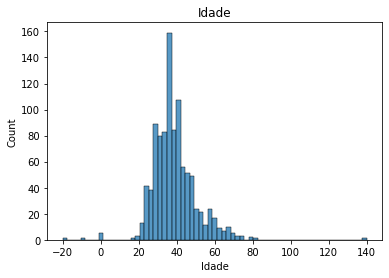

In [44]:
sns.histplot(dataset['Idade']).set_title('Idade')

O histograma mostra esses valores.

Tomaremos a mediana para esses resultados.

In [45]:
mediana_idade = sts.median(dataset['Idade'])
mediana_idade

37

Note que a mediana dos resultados foram iguais a 37, portanto podemos fazer a substituição dos
valores de interesse.

In [46]:
# Fazendo a substituição dos dados de idade fora do domínio
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120), 'Idade'] = mediana_idade 

In [47]:
dataset.loc[(dataset['Idade'] < 0)|(dataset['Idade'] > 120)]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


Text(0.5, 1.0, 'Idade')

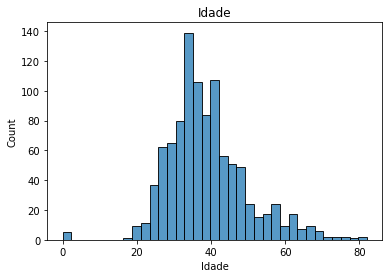

In [49]:
sns.histplot(dataset['Idade']).set_title('Idade')

Note como agora não temos mais nenhum valor que esteja fora do domínio dos dados.

### **Análise de dados duplicados**

Uma das terefas muito importantes é verificar se existem dados duplicados em nossa amostra de
dados. A próxima parte iremos realizar exatamente essa tarefa.

In [51]:
dataset[dataset.duplicated(['ID'], keep=False)]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


Note como existem dois registros. Logo temos um conjunto de dois valores duplicados. Precisamos eliminar um desses valores.

In [52]:
# Excluindo um dos Ids
# Estamos procurando por dados duplicados na coluna ID
# mantendo o primeiro valor e excluindo os outro, 
# estamos realizando toda operação inplace.

dataset.drop_duplicates(subset='ID', keep='first', inplace=True)

In [53]:
dataset[dataset.duplicated(['ID'], keep=False)]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


Pela linha acima não existem mais valores duplicados. :)

#### **Tratando valores de Estado**

Como percebemos para análise de resultados, existem muitos valores de estados que estão fora
do domínio do nosso modelo.

In [54]:
# Estamos substiuindo todos os valores pela moda RS
dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD']), 'Estado'] = 'RS'
agrupando_estado = dataset.groupby(['Estado']).size()
agrupando_estado

Estado
PR    257
RS    483
SC    258
dtype: int64

Note como agora só temos os estados, Paraná, Rio Grande do Sul e Santa Catarina.

#### **Tratando valores de Salários**

Não existem regras universais para se tratar valores muito elevados, ou os chamados outliers.
Uma das regras utilizadas é verificar se esses valores são duas vezes maiores que os desvio-padrão. Caso esse evento ocorra podemos tratar os resultados.


In [55]:
desv_salario = sts.stdev(dataset['Salario'])
desv_salario


528988918.4679201

In [56]:
# VERIFICANDO se valores seguiem esse padrão
dataset.loc[dataset['Salario'] >= 2*desv_salario]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [57]:
mediana_salario = sts.median(dataset['Salario'])
mediana_salario

8637195.5

In [58]:
dataset.loc[dataset['Salario'] >= 2*mediana_salario, 'Salario'] = mediana_salario

In [59]:
dataset.loc[dataset['Salario'] >= 2*mediana_salario]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


Agora não temos mais essa condição para salário.